## __Measuring Ideal Gas Constant__ ##

Group: Logan MacHale, Jaden Majid

## Familiarization Notes - Feb 25 ##

__Clarify Objective__

We will be measuring the ideal gas constant R by assembling a force meter and using it to measure the force of the gas on various weights.

My hypothesis is that the gas constant for air can be measured using our apparatus and it will be similar to the scientifically accepted value of ~8.31.

__Physical meanings__

- Volume(V):$m^3$
- Force(F):$N$
- Pressure(P):$Pa$
- Mass(m): $kg$
- Acceleration(a): $m/s^2$
- Moles(n): $mol$
- Temperature(T): $K$
- R(gas constant): $J/(K*mol)$

__Relate Quantities__

Think of all of the equations and tools you will need on the path from raw data to a final result.

What statistical tools do you need?

__What graphs will you do?__

1/V as a function of m


What other equations do I need?

- $V_{cylinder}=\pi*r^2*h$
- $A_{circle}=\pi*r^2$
- $P=F/A$
- $1/V=\frac{P_a}{nRT}-m\frac{g}{AnRT}$

__Logbook__

__15:05__ First run of data collection started

__15:45__ First run of data collection complete

__16:00__ Friction must be taken into account

measurements were taken by hanging weights from syringe, but this set of data collected was of low quality as the gas was leaking slightly from the syringe and so it will be disregarded for analysis.

## Mar 1 ##

__Equation with friction:__ $\dfrac{1}{V} = -m * \dfrac{g}{AnRT}+\dfrac{AP_a+F_k}{AnRT}$

__Logbook:__

__15:15__ second run of data collection started using same weight handing technique

__15:20__ realized we need to account for the fact that the syringe has a relatively large range of values for 1/V for which it will be at equilibrium due to static friction

Spent majority of remaining time devising method of approximating true equilibrium. This will be done by taking the maximum and minimum 1/V and averaging them to calculate the actual equilibrium value of 1/V.



## Mar 8 ##

Taking measurements of the average of final volumes due to expansion and contraction. Weights were pulled down from equilibrium position and allowed to contract to equilibrium and then pushed upwards and allowed to expand to equilibrium. These were averaged as 1/V.

__Logbook:__

__14:05__ Measurements started

__14:30__ Data set complete with data for every 100g of weight

Can likely get better results by using volume as the independent variable and the average of the applied force to "break" equilibrium in either direction as the dependent variable, but analysis of the current data will be completed and this described method will be done next week.


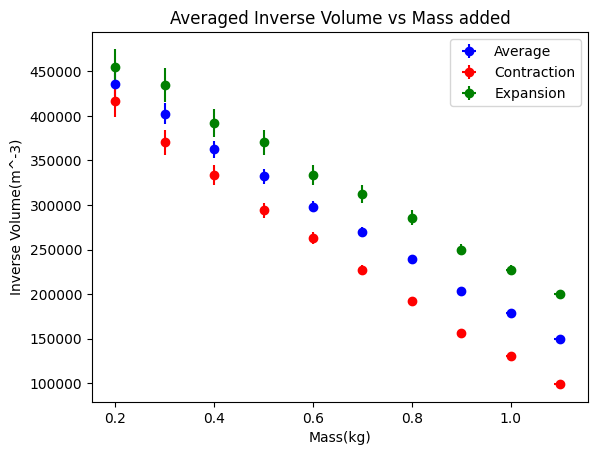

In [2]:
"""Code for plotting data"""

import matplotlib.pyplot as plt
import numpy as np

fname = 'AveragedData.csv'

data = np.loadtxt(fname, delimiter=',', comments='#',
                  usecols=(0, 1, 2, 3))

x = data[:, 0]
y = data[:, 2]
avg_x_sigma = data[:, 1]
avg_y_sigma = data[:, 3]

plt.errorbar(x, y, avg_y_sigma, avg_x_sigma, "bo")

fname = 'GasContractsData.csv'

data = np.loadtxt(fname, delimiter=',', comments='#',
                  usecols=(1, 2, 7, 8))

x = data[:, 0]
y = data[:, 2]
con_x_sigma = data[:, 1]
con_y_sigma = data[:, 3]

plt.errorbar(x, y, yerr=con_y_sigma, xerr=con_x_sigma, fmt='ro')

fname = 'GasExpandsData.csv'

data = np.loadtxt(fname, delimiter=',', comments='#',
                  usecols=(1, 2, 7, 8))

x = data[:, 0]
y = data[:, 2]
ex_x_sigma = data[:, 1]
ex_y_sigma = data[:, 3]

plt.errorbar(x, y, yerr=ex_y_sigma, xerr=ex_x_sigma, fmt='go')
plt.title("Averaged Inverse Volume vs Mass added")
plt.legend(["Average", "Contraction", "Expansion"])
plt.xlabel("Mass(kg)")
plt.ylabel("Inverse Volume(m^-3)")

plt.show()

Fit parameters:
slope = 2.801e+05 +/- 5.062e+03
1/v0 = 5.071e+05 +/- 4.850e+03

Goodness of fit - chi square measure:
Chi2 = 5.0060727609677445, Chi2/dof = 0.6257590951209681



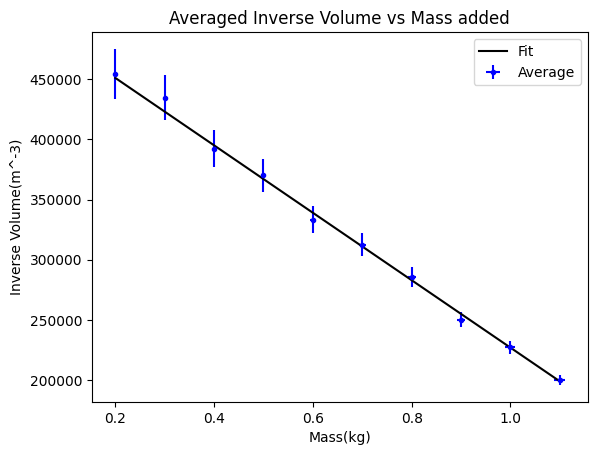

In [3]:
"""Code for fitting and finding chi squared of data vs fit"""

from scipy.optimize import curve_fit

def lin_fit(x, k, b):
    return -k*x+b

guesses = (-.320,.500)


fit_params, fit_cov = curve_fit(lin_fit, x, y, sigma=avg_y_sigma, p0=guesses,
                                maxfev=10**5)

# read out parameter results
param_names = ['slope', '1/v0']

fit_params_error = np.sqrt(np.diag(fit_cov))

print("Fit parameters:")
for i in range(len(fit_params)):
    print('{} = {:.3e} +/- {:.3e}'.format(param_names[i],
                                          fit_params[i],
                                          fit_params_error[i]))


# function that  calculates the chi square value of a fit
def chi_square(fit_parameters, x, y, sigma):
    #
    return np.sum((y-lin_fit(x, *fit_parameters))**2/sigma**2)


# calculate and print chi square as well as the per degree-of-freedom value
chi2 = chi_square(fit_params, x, y, avg_y_sigma)
dof = len(x) - len(fit_params)
print("\nGoodness of fit - chi square measure:")
print("Chi2 = {}, Chi2/dof = {}\n".format(chi2, chi2/dof))

marr = np.linspace(0.2, 1.1, 1000)
varr = -fit_params[0] * marr + fit_params[1]

plt.errorbar(x, y, yerr=ex_y_sigma, xerr=ex_x_sigma, fmt='b.')
plt.plot(marr, varr, 'k-')
plt.title("Averaged Inverse Volume vs Mass added")
plt.legend(["Fit", "Average", "Contraction", "Expansion"])
plt.xlabel("Mass(kg)")
plt.ylabel("Inverse Volume(m^-3)")

plt.show()

__Calculating A:__

$h = 57mm = 57E-3 m$

$V = 10mL = 10cm^3  = 1E-5 m^3$

$V=A*h$

$A=\dfrac{V}{h}$

$A = 1.7544E-4 m^2$

Temperature Mar 8:

$T = 295.15 K$

__Calculating n:__

$p = 1.168 kg/ m^3$

$o = 28.9647E-3 kg/mol$

$\dfrac{p}{o} = q = 40.325 mol/m^3$

$q*V = n$

$n = 8.065E-5 mol$

__Calculating R from slope parameter__

let $k$ denote the slope parameter

$slope = k = \dfrac{g}{AnRT}$

Therefore:

$R = \dfrac{g}{AnkT}$

If the uncertainties in g, n, and T are assumed to be negligible, the resulting uncertainty propagation will be:

$\sigma_R = \dfrac{\sqrt{A^2*\sigma_k^2+k^2*\sigma_A^2}}{A^2 k^2}$


In [4]:
"""Code for converting fit to R"""

n = 8.065E-5
g = 9.81
A = 1.7544E-4
uA = 1.7812E-6
T = 295.15
k = fit_params[0]
uk = fit_params_error[0]

R = g / (A * n * T * k)
uR = g / (n * T) * np.sqrt(A ** 2 * uk ** 2 + k ** 2 * uA ** 2)/(A ** 2 * k ** 2)

print("Gas constant R = {:.3f} \u00B1 {:.3f} J/(K*mol)".format(R, uR))


Gas constant R = 8.386 ± 0.174 J/(K*mol)


## Mar 15 ##

Result for R obtained last week will be compared to the scientifically accepted value using the t-score method.

$R_e = 8.386 \pm 0.174 \dfrac{J}{K*mol}$

$R_t = 8.31446261815324 \dfrac{J}{K*mol}$

$t' = \dfrac{|R_e-R_t|}{\sigma_{R_e}} = 0.411$

$t' < 1$ so it is likely that the experimentally determined value of the gas constant $R_e$ is not actually different from the scientifically accepted value $R_t$

Results are excellent so they will be attempted to be replicated using another method. Instead of volume due to contraction and expansion being averaged, the maximum and minimum force applied will be averaged.

Starting with the torque calibration for the forcemeter, hanging various weights from the syringe and reading the weight measurement on the scale to find the torque force multiplier.

__Logbook__

__2:45__ Forcemeter calibration started

__2:50__ Python script for fitting torque calibration data started

__3:00__ Pyhton script for linear fit for torque calibration complete



Goodness of fit - chi square measure:
Chi2 = 0.6801208531748653, Chi2/dof = 0.09716012188212361

Fit parameters:
gain = 1.811e+00 +/- 6.714e-02
y intercept = 2.777e-02 +/- 2.727e-02


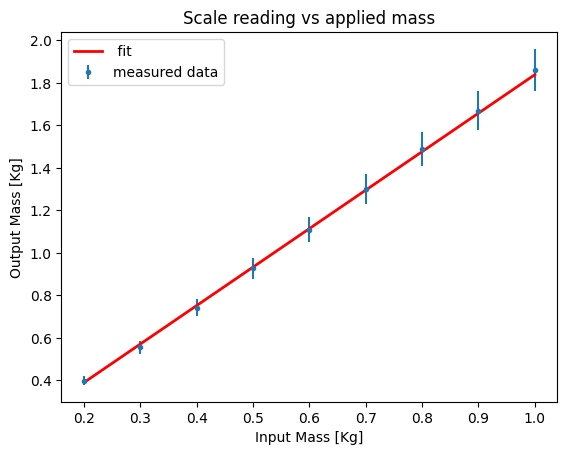

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

fname = 'Force meter calibration.csv'

x_name = 'Input Mass'
x_units = 'Kg'
y_name = 'Output Mass'
y_units = 'Kg'

guesses = (1.8, 0.0)


def fit_function(x, m, b):
    return m*x+b


dydx = 10.

data = np.loadtxt(fname, delimiter=',', comments='#', usecols=(0, 1, 2, 3))

x = data[:, 0]
y = data[:, 2]

y_sigma = np.sqrt((data[:, 3])**2+dydx**2*data[:, 1]**2)

x_fitfunc = np.linspace(min(x), max(x), 500)

y_guess = fit_function(x_fitfunc, *guesses)


fit_params, fit_cov = curve_fit(fit_function, x, y, sigma=y_sigma, p0=guesses,
                                maxfev=10**5)


def chi_square(fit_parameters, x, y, sigma):
    #
    return np.sum((y-fit_function(x, *fit_parameters))**2/sigma**2)


chi2 = chi_square(fit_params, x, y, y_sigma)
dof = len(x) - len(fit_params)
print("\nGoodness of fit - chi square measure:")
print("Chi2 = {}, Chi2/dof = {}\n".format(chi2, chi2/dof))

fit_cov = fit_cov*dof/chi2

fit_params_error = np.sqrt(np.diag(fit_cov))

param_names = ['gain', 'y intercept']
print("Fit parameters:")
for i in range(len(fit_params)):
    print('{} = {:.3e} +/- {:.3e}'.format(param_names[i],
                                          fit_params[i],
                                          fit_params_error[i]))


y_fitfunc = fit_function(x_fitfunc, *fit_params)

plt.errorbar(x, y, yerr=y_sigma, marker='.',
             linestyle='', label="measured data")
plt.plot(x_fitfunc, y_fitfunc, marker="", linestyle="-", linewidth=2, color="r",
         label=" fit")

plt.xlabel('{} [{}]'.format(x_name, x_units))
plt.ylabel('{} [{}]'.format(y_name, y_units))
plt.title(r'Scale reading vs applied mass')

plt.legend(loc='best', numpoints=1)

plt.show()


y_fit = fit_function(x, *fit_params)




## Mar 22 ##

__Plotting applied force dependant on 1/V:__

$F_{s} + AP_{a} + \dfrac{1}{V} *  AnRT = - F_a$

$n = 8.065E-5 mol$

Temperature Mar 22:

$T = 294.35 K$

$A = 1.7544E-4 m^2$

__Logbbok__
__15:00__ Measurements of force started being taken
